<h1><center>Laboratorio 8: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Benjamín Hernth
- Nombre de alumno 2: Antonia Villegas


### **Link de repositorio de GitHub:** `https://github.com/morbul/MDS7202_entregas`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [ ]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargamos los datos de stats_players.csv:

In [ ]:
df_players = pd.read_csv('stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


Para df_players hay 17.588 observaciones para 39 variables. Ahora vemos comó son estas variables:

In [ ]:
df_players.dtypes

Name                 object
Nationality          object
National_Position    object
Club_Position        object
Height                int64
Weight                int64
Preffered_Foot       object
Age                   int64
Work_Rate            object
Weak_foot             int64
Skill_Moves           int64
Ball_Control          int64
Dribbling             int64
Marking               int64
Sliding_Tackle        int64
Standing_Tackle       int64
Aggression            int64
Reactions             int64
Interceptions         int64
Vision                int64
Composure             int64
Crossing              int64
Short_Pass            int64
Long_Pass             int64
Acceleration          int64
Speed                 int64
Stamina               int64
Strength              int64
Balance               int64
Agility               int64
Jumping               int64
Heading               int64
Shot_Power            int64
Finishing             int64
Long_Shots            int64
Curve               

## 1.1 Predicción de Seleccionados Nacionales

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego.

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país.

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

Se crea una nueva columna llamada 'Label' en el dataframe df_players. Esta columna etiqueta los valores nulos en la columna 'National_Position' como 'No seleccionado' y los valores no nulos como 'Seleccionado'. Además, rellena los valores nulos en la columna 'National_Position' con el valor 'NoSel'

In [ ]:
import pandas as pd

# Identificar valores nulos en 'National_Position' y asignar etiquetas
df_players['Label'] = df_players['National_Position'].apply(lambda x: 'No seleccionado' if pd.isnull(x) else 'Seleccionado')
df_players['National_Position'].fillna('NoSel', inplace=True)
# Mostrar el resultado
print(df_players[['National_Position', 'Label']])

      National_Position            Label
0                    LS     Seleccionado
1                    RW     Seleccionado
2                    LW     Seleccionado
3                    LS     Seleccionado
4                    GK     Seleccionado
...                 ...              ...
17583             NoSel  No seleccionado
17584             NoSel  No seleccionado
17585             NoSel  No seleccionado
17586             NoSel  No seleccionado
17587             NoSel  No seleccionado

[17588 rows x 2 columns]


Vamos a ver cuánta gente quedó seleccionada y cuanta no:

In [ ]:
import pandas as pd

# Contar los ejemplos por cada clase
ejemplos_por_clase = df_players['Label'].value_counts()

# Mostrar el resultado
print(ejemplos_por_clase)

No seleccionado    16513
Seleccionado        1075
Name: Label, dtype: int64


### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores.

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [ ] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [ ] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [ ] Crear 3 ``pipelines`` con diferentes clasificadores.
- [ ] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

En esta etapa de preprocesamiento, vamos a ver según el Player_Stats_Report.html cómo se comporta cada variable según el reporte Player Stats:

1. Name: categórica
2. Nationality: categórica
3. National_Position: categórica
4. Club_Position: categórica
5. Height: numérica, con distribución gaussiana
6. Weight: numérica, con distribución gaussiana
7. Preffered_Foot: categórica
8. Age: numérica, con distribución gaussiana
9. Work_Rate: categórica
10. Weak_foot. categórica
11. Skill_Moves: categórica
12. Ball_Control: numérica, con distribución bimodal
13. Dribbling: numérica, con distribución bimodal
14. Marking: numérica, con distribución bimodal
15. Sliding_Tackle: numérica, con distribución bimodal
16. Standing_Tackle: numérica, con distribución bimodal
17. Aggression: numérica, con distribución bimodal
18. Reactions: numérica, con distribución gaussiana
19. Interceptions: numérica, con distribución bimodal
20. Vision: numérica, con distribución gaussiana
21. Composure: numérica, con distribución gaussiana
22. Crossing: numérica, con distribución bimodal
23. Short_Pass: numérica, con distribución bimodal
24. Long_Pass: numérica, con distribución gaussiana
25. Acceleration: numérica, con distribución gaussiana
26. Speed: numérica, con distribución gaussiana
27. Stamina: numérica, con distribución bimodal
28. Strength: numérica, con distribución gaussiana
29. Balance: numérica, con distribución gaussiana
30. Agility: numérica, con distribución gaussiana
31. Jumping: numérica, con distribución gaussiana
32. Heading: numérica, con distribución bimodal
33. Shot_Power: numérica, con distribución bimodal
34. Finishing: numérica, pero no sigue una distribución típica
35. Long_Shots: numérica, pero no sigue una distribución típica
36. Curve: numérica, pero no sigue una distribución típica
37. Freekick_Accuracy: numérica, pero no sigue una distribución típica
38. Penalties: numérica, con distribución gaussiana
39. Volleys: numérica, con distribución gaussiana


In [ ]:
#Preprocesamiento:


Antes de ColumnTransformer vamos a ver cómo es la correlación entre las variables para sacar aquellas que podrián hacer el cómputo más difícil.

In [ ]:
#Calculamos las correlaciones entre variables exclusivamente numéricas:
import pandas as pd

# Excluir columnas no numéricas
dataset_numeric = df_players.select_dtypes(include=[float, int])

# Calcular las correlaciones
correlaciones = dataset_numeric.corr()

# Mostrar el resultado
correlaciones



,Height,Weight,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
Height,1.000000,0.758213,0.076900,-0.180301,-0.431087,-0.402473,-0.483443,-0.042552,-0.069650,-0.054327,...,-0.611175,-0.062979,0.005491,-0.273268,-0.346976,-0.364029,-0.422953,-0.379990,-0.321041,-0.333406
Weight,0.758213,1.000000,0.223489,-0.135326,-0.375112,-0.338387,-0.412902,-0.030551,-0.062340,-0.047123,...,-0.535397,0.005880,0.019306,-0.188656,-0.281668,-0.274357,-0.343283,-0.293818,-0.246066,-0.258831
Age,0.076900,0.223489,1.000000,0.086377,-0.015930,0.083066,0.004740,0.131220,0.096527,0.116701,...,-0.019456,0.168808,0.138045,0.151401,0.064778,0.149859,0.139331,0.195640,0.131781,0.134209
Weak_foot,-0.180301,-0.135326,0.086377,1.000000,0.336958,0.367495,0.363454,0.026852,0.025792,0.043587,...,0.306025,0.064738,0.190986,0.335000,0.362094,0.365733,0.359143,0.345879,0.340888,0.366717
Skill_Moves,-0.431087,-0.375112,-0.015930,0.336958,1.000000,0.727139,0.762636,0.032755,0.042994,0.070801,...,0.637384,0.035216,0.391677,0.640205,0.715237,0.680452,0.689282,0.634878,0.662117,0.701030
Ball_Control,-0.402473,-0.338387,0.083066,0.367495,0.727139,1.000000,0.931120,0.355324,0.356944,0.391612,...,0.695534,0.172861,0.658152,0.829920,0.781241,0.831864,0.832026,0.763334,0.767824,0.789309
Dribbling,-0.483443,-0.412902,0.004740,0.363454,0.762636,0.931120,1.000000,0.228470,0.243221,0.269953,...,0.754682,0.117423,0.548294,0.795026,0.817036,0.836086,0.840067,0.750012,0.765258,0.804638
Marking,-0.042552,-0.030551,0.131220,0.026852,0.032755,0.355324,0.228470,1.000000,0.959955,0.960271,...,0.085643,0.258597,0.546814,0.219037,-0.096165,0.116512,0.206373,0.233285,0.062812,0.013446
Sliding_Tackle,-0.069650,-0.062340,0.096527,0.025792,0.042994,0.356944,0.243221,0.959955,1.000000,0.971731,...,0.103458,0.254882,0.523804,0.217374,-0.098868,0.117080,0.216781,0.241047,0.059250,0.015051
Standing_Tackle,-0.054327,-0.047123,0.116701,0.043587,0.070801,0.391612,0.269953,0.960271,0.971731,1.000000,...,0.110566,0.255081,0.555309,0.256714,-0.058740,0.156769,0.246998,0.274578,0.096380,0.053355


Hacemos un heatmap de las variables numéricas para interpretar más facílmente:

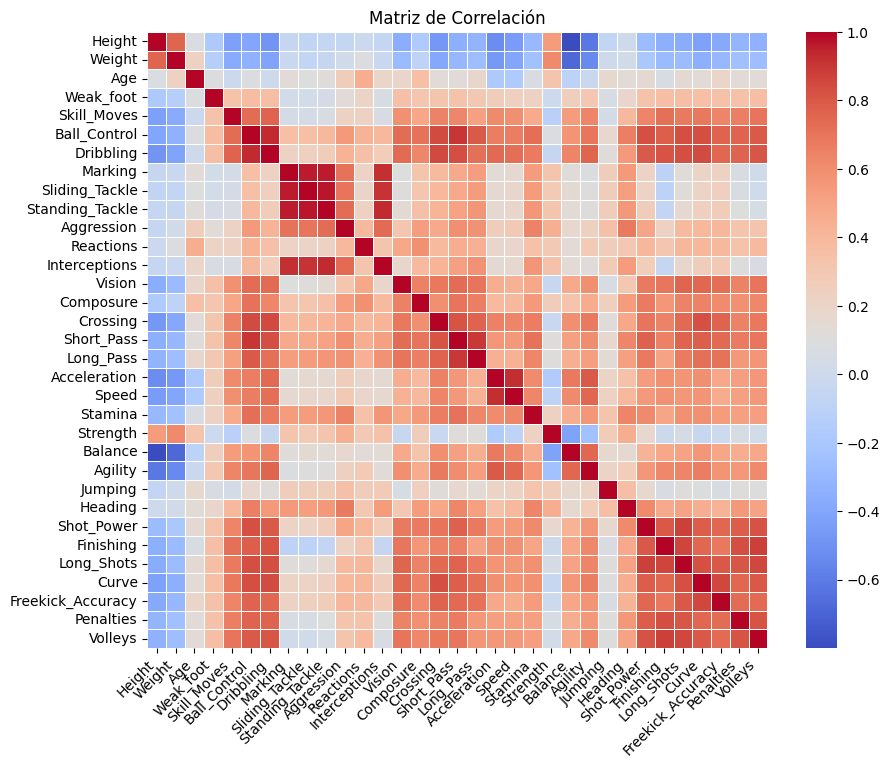

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las correlaciones
correlaciones = dataset_numeric.corr()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 8))

# Crear el heatmap de correlaciones
sns.heatmap(correlaciones, cmap='coolwarm', linewidths=0.5, ax=ax)

# Personalizar el aspecto del heatmap
ax.set_title('Matriz de Correlación')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Mostrar el heatmap
plt.show()


Como se puede ver, hay muchas variables que están correlacionadas. Ahora vemos cuáles están correlacionadas entre sí:

In [ ]:

import pandas as pd
import numpy as np

# Excluir columnas no numéricas
dataset_numeric = df_players.select_dtypes(include=[np.number])

# Calcular las correlaciones
correlaciones = dataset_numeric.corr()

# Definir umbral de correlación alta
umbral = 0.8

# Identificar variables con altas correlaciones
variables_con_altas_correlaciones = set()
num_variables = len(correlaciones.columns)
#forma correlaciones sin for ni if

correlaciones_abs = np.abs(correlaciones.values)
condicion = correlaciones_abs > umbral
triangular_superior = np.triu(np.ones_like(correlaciones_abs, dtype=bool), k=1)

# Obtener los índices donde se cumple la condición y la matriz triangular superior
indices = np.argwhere(np.logical_and(condicion, triangular_superior))

columnas = correlaciones.columns[indices]
variables_con_altas_correlaciones = set(map(tuple, columnas))
variables_con_altas_correlaciones

<ipython-input-97-2a9f7b3b17ec>:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  columnas = correlaciones.columns[indices]


{('Acceleration', 'Speed'),
 ('Ball_Control', 'Crossing'),
 ('Ball_Control', 'Curve'),
 ('Ball_Control', 'Dribbling'),
 ('Ball_Control', 'Long_Shots'),
 ('Ball_Control', 'Short_Pass'),
 ('Ball_Control', 'Shot_Power'),
 ('Crossing', 'Curve'),
 ('Crossing', 'Short_Pass'),
 ('Curve', 'Freekick_Accuracy'),
 ('Dribbling', 'Crossing'),
 ('Dribbling', 'Curve'),
 ('Dribbling', 'Finishing'),
 ('Dribbling', 'Long_Shots'),
 ('Dribbling', 'Short_Pass'),
 ('Dribbling', 'Volleys'),
 ('Finishing', 'Long_Shots'),
 ('Finishing', 'Penalties'),
 ('Finishing', 'Volleys'),
 ('Long_Shots', 'Curve'),
 ('Long_Shots', 'Freekick_Accuracy'),
 ('Long_Shots', 'Penalties'),
 ('Long_Shots', 'Volleys'),
 ('Marking', 'Interceptions'),
 ('Marking', 'Sliding_Tackle'),
 ('Marking', 'Standing_Tackle'),
 ('Penalties', 'Volleys'),
 ('Short_Pass', 'Long_Pass'),
 ('Shot_Power', 'Long_Shots'),
 ('Shot_Power', 'Volleys'),
 ('Sliding_Tackle', 'Interceptions'),
 ('Sliding_Tackle', 'Standing_Tackle'),
 ('Standing_Tackle', 'Interce

A partir del código anterior, creamos un nuevo dataset sacando variables:

In [ ]:
import pandas as pd
import numpy as np

# Crear nuevo dataset sin variables con altas correlaciones
dataset_sin_altas_correlaciones = df_players.drop(columns=set(map(lambda variable: variable[0], variables_con_altas_correlaciones)))
# Mostrar el resultado
print("Nuevo dataset sin variables con altas correlaciones:")
dataset_sin_altas_correlaciones

Nuevo dataset sin variables con altas correlaciones:


,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Freekick_Accuracy,Volleys,Label
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,92,92,80,63,90,95,85,76,88,Seleccionado
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,87,74,59,95,90,68,71,90,85,Seleccionado
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,90,79,49,82,96,61,62,84,83,Seleccionado
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,77,89,76,60,86,69,77,84,88,Seleccionado
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,61,44,83,35,52,78,25,11,11,Seleccionado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NoSel,Sub,183,82,Right,19,Medium / Medium,1,...,21,17,52,52,27,56,14,13,12,No seleccionado
17584,Dylan McGoey,Republic of Ireland,NoSel,Sub,185,80,Right,19,Medium / Medium,2,...,19,21,42,45,28,53,12,13,12,No seleccionado
17585,Tommy Ouldridge,England,NoSel,Res,173,61,Right,18,High / Medium,2,...,60,64,34,83,54,61,41,36,37,No seleccionado
17586,Mark Foden,Scotland,NoSel,Sub,180,80,Right,21,Medium / Medium,3,...,40,40,61,60,34,48,15,12,12,No seleccionado


Considermos que es mejor sacar también las variables categóricas Name, Preffered_Foot y Work_Rate:

In [ ]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['Name', 'Preffered_Foot','Work_Rate']

# Eliminar las columnas
df = dataset_sin_altas_correlaciones.drop(columnas_a_eliminar, axis=1)

# Imprimir el dataset resultante
df

,Nationality,National_Position,Club_Position,Height,Weight,Age,Weak_foot,Skill_Moves,Aggression,Reactions,...,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Freekick_Accuracy,Volleys,Label
0,Portugal,LS,LW,185,80,32,4,5,63,96,...,92,92,80,63,90,95,85,76,88,Seleccionado
1,Argentina,RW,RW,170,72,29,4,4,48,95,...,87,74,59,95,90,68,71,90,85,Seleccionado
2,Brazil,LW,LW,174,68,25,5,5,56,88,...,90,79,49,82,96,61,62,84,83,Seleccionado
3,Uruguay,LS,ST,182,85,30,4,4,78,93,...,77,89,76,60,86,69,77,84,88,Seleccionado
4,Germany,GK,GK,193,92,31,4,1,29,85,...,61,44,83,35,52,78,25,11,11,Seleccionado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Republic of Ireland,NoSel,Sub,183,82,19,1,1,25,48,...,21,17,52,52,27,56,14,13,12,No seleccionado
17584,Republic of Ireland,NoSel,Sub,185,80,19,2,1,15,43,...,19,21,42,45,28,53,12,13,12,No seleccionado
17585,England,NoSel,Res,173,61,18,2,2,44,42,...,60,64,34,83,54,61,41,36,37,No seleccionado
17586,Scotland,NoSel,Sub,180,80,21,3,1,23,46,...,40,40,61,60,34,48,15,12,12,No seleccionado


También quitamos observaciones que tengan algún valor nulo:

In [ ]:
df.dropna(inplace=True)
df

,Nationality,National_Position,Club_Position,Height,Weight,Age,Weak_foot,Skill_Moves,Aggression,Reactions,...,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Freekick_Accuracy,Volleys,Label
0,Portugal,LS,LW,185,80,32,4,5,63,96,...,92,92,80,63,90,95,85,76,88,Seleccionado
1,Argentina,RW,RW,170,72,29,4,4,48,95,...,87,74,59,95,90,68,71,90,85,Seleccionado
2,Brazil,LW,LW,174,68,25,5,5,56,88,...,90,79,49,82,96,61,62,84,83,Seleccionado
3,Uruguay,LS,ST,182,85,30,4,4,78,93,...,77,89,76,60,86,69,77,84,88,Seleccionado
4,Germany,GK,GK,193,92,31,4,1,29,85,...,61,44,83,35,52,78,25,11,11,Seleccionado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Republic of Ireland,NoSel,Sub,183,82,19,1,1,25,48,...,21,17,52,52,27,56,14,13,12,No seleccionado
17584,Republic of Ireland,NoSel,Sub,185,80,19,2,1,15,43,...,19,21,42,45,28,53,12,13,12,No seleccionado
17585,England,NoSel,Res,173,61,18,2,2,44,42,...,60,64,34,83,54,61,41,36,37,No seleccionado
17586,Scotland,NoSel,Sub,180,80,21,3,1,23,46,...,40,40,61,60,34,48,15,12,12,No seleccionado


In [ ]:
df.dtypes

Nationality          object
National_Position    object
Club_Position        object
Height                int64
Weight                int64
Age                   int64
Weak_foot             int64
Skill_Moves           int64
Aggression            int64
Reactions             int64
Interceptions         int64
Vision                int64
Composure             int64
Long_Pass             int64
Speed                 int64
Stamina               int64
Strength              int64
Balance               int64
Agility               int64
Jumping               int64
Heading               int64
Freekick_Accuracy     int64
Volleys               int64
Label                object
dtype: object



Para el ColumnTransformer se usan 2 transformadores: uno para las columnas numéricas y otro para las columnas categóricas. El transformador para las columnas numéricas aplica StandardScaler, que escala las variables numéricas para que tengan media cero y desviación 1. El transformador para las columnas categóricas aplica OneHotEncoder, que codifica las variables categóricas en una representación de one-hot encoding. Luego se crean pipelines de clasificación con los algoritmos de Random Forest, SVM y KNN

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB


categoricas = ['Nationality','National_Position','Club_Position']
numericas = df.select_dtypes(include=['float64', 'int64'])

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Aggression',
       'Reactions', 'Interceptions', 'Vision', 'Composure', 'Long_Pass',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Freekick_Accuracy', 'Volleys'],),  # Preprocesamiento para columnas numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'),['Nationality', 'National_Position', 'Club_Position'])
    ], remainder="passthrough"
)

# Crear los pipelines con diferentes clasificadores
#random forest: enssemble de arboles de decision
#svc: support vector classifier (svm)
#knn    k-nearest neighbors
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='poly', degree=5))
])

pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])



Justificación:

Se decide usar StandardScaler y OneHotEncoder en el primer caso para normalizar los datos que son numéricos pues es importante porque elimina las diferencias de escala, mejora la convergencia del algoritmo, evita la dominancia de características, preserva la información relativa y facilita la interpretación y visualización de los datos. Por otro lado, al usar OneHotEncoder con variables categóricas estamos implementando una forma sencilla de asignar valores numéricos a las diferentes categorías de una variable categórica.

Para la clasificicación se usó Random Forest, SVC y KNN por las siguientes razones:

El Random Forest es muy preciso y puede manejar conjuntos de datos con características numéricas y categóricas, tiene una buena capacidad para manejar características irrelevantes o ruidosas, ya que utiliza una combinación de árboles de decisión. Además proporciona una medida de importancia de características, lo que facilita la selección de características relevantes y es menos propenso al sobreajuste en comparación con un solo árbol de decisión, ya que utiliza el promedio de múltiples árboles. Si hablamos de SVC podemos decir que es efectivo en espacios de alta dimensionalidad y puede manejar eficientemente conjuntos de datos con muchas características. También puede manejar tanto problemas de clasificación lineales como no lineales, gracias a los diferentes kernels que se pueden utilizar y tiene buenas propiedades teóricas, como la maximización del margen y la posibilidad de controlar la función de decisión utilizando hiperparámetros. Las bondades de KNN son que no hace suposiciones sobre la distribución de los datos, lo que lo hace útil en situaciones donde la relación entre las características y las etiquetas puede ser compleja o no lineal.



### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [ ] Separar el conjunto de datos en entrenamiento y de prueba.
- [ ] Entrenar los `pipelines`.
- [ ] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

In [ ]:
%pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Para trabajar con muestras simétricas usamos SMOTENC donde se desea generar muestras sintéticas para equilibrar las clases:

In [ ]:
from imblearn.over_sampling import SMOTENC
features = df.drop(columns=["Label"])
labels = df.loc[:, "Label"]


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, shuffle=True, stratify=labels, random_state=42
)

# Obtener el índice de las columnas categóricas
categorical_features = [0,1,2]  # Define aquí qué columnas son categóricas

# Aplicar SMOTE-NC al conjunto de entrenamiento
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_oversampled, y_train_oversampled = smote_nc.fit_resample(X_train, y_train)

X_train_oversampled_dense = X_train_oversampled.values
X_test_dense = X_test.values

# Verificar el balance de clases después de aplicar SMOTE-NC
print(y_train_oversampled.value_counts())


No seleccionado    11063
Seleccionado       11063
Name: Label, dtype: int64


Vemos ahora si queda algún valor faltante:

In [ ]:
#X_train.isnull().sum()

In [ ]:
X_train_oversampled.isnull().sum()

Nationality          0
National_Position    0
Club_Position        0
Height               0
Weight               0
Age                  0
Weak_foot            0
Skill_Moves          0
Aggression           0
Reactions            0
Interceptions        0
Vision               0
Composure            0
Long_Pass            0
Speed                0
Stamina              0
Strength             0
Balance              0
Agility              0
Jumping              0
Heading              0
Freekick_Accuracy    0
Volleys              0
dtype: int64

In [ ]:
X_train_oversampled

,Nationality,National_Position,Club_Position,Height,Weight,Age,Weak_foot,Skill_Moves,Aggression,Reactions,...,Long_Pass,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Freekick_Accuracy,Volleys
0,England,NoSel,Res,191,72,19,3,2,60,63,...,28,68,63,64,67,38,74,67,22,26
1,England,NoSel,Sub,183,76,22,2,2,56,54,...,36,68,70,68,60,58,56,51,29,29
2,Turkey,NoSel,Sub,192,93,34,2,1,40,65,...,23,42,30,72,54,44,67,12,13,18
3,Ghana,NoSel,RW,172,70,22,3,3,21,56,...,47,84,60,36,80,87,73,29,34,54
4,Ecuador,LCB,Sub,189,89,26,3,2,66,68,...,57,65,66,91,53,40,67,79,41,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22121,Colombia,LCB,Res,187,83,21,3,2,74,67,...,59,73,66,87,58,63,75,78,26,31
22122,Argentina,Sub,GK,188,80,27,3,1,30,78,...,19,57,33,63,52,62,61,14,16,15
22123,Finland,Sub,LB,171,64,24,3,2,77,69,...,66,79,78,59,84,80,78,49,55,51
22124,United States,Sub,Res,177,76,25,3,2,57,62,...,66,70,73,76,58,70,63,60,42,38


In [ ]:
y_train_oversampled

0        No seleccionado
1        No seleccionado
2        No seleccionado
3        No seleccionado
4           Seleccionado
              ...       
22121       Seleccionado
22122       Seleccionado
22123       Seleccionado
22124       Seleccionado
22125       Seleccionado
Name: Label, Length: 22126, dtype: object

Hacemos una clasificación usando SVC:

In [ ]:
pipeline_svc.fit(X_train_oversampled, y_train_oversampled)
y_pred_svc = pipeline_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))


                 precision    recall  f1-score   support

No seleccionado       0.99      1.00      0.99      5449
   Seleccionado       0.99      0.84      0.91       355

       accuracy                           0.99      5804
      macro avg       0.99      0.92      0.95      5804
   weighted avg       0.99      0.99      0.99      5804



A partir de la clasificación usando SVC reportamos una matriz de confusión:

In [ ]:
from sklearn.metrics import confusion_matrix
# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_svc)

# Imprimir la matriz de confusión
print(confusion)

[[5447    2]
 [  57  298]]


Con estos resutados de esta matriz de confusión podemos decir que la matriz de confusión y las métricas asociadas indican que el modelo tiene un buen rendimiento en la clasificación de ambas clases. La mayoría de las instancias se clasifican correctamente, con una alta precisión y sensibilidad.

Hacemos una clasificación usando KNN:

In [ ]:

pipeline_knn.fit(X_train_oversampled, y_train_oversampled)
y_pred_knn = pipeline_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
#mirar bien

                 precision    recall  f1-score   support

No seleccionado       0.99      0.98      0.98      5449
   Seleccionado       0.68      0.81      0.74       355

       accuracy                           0.96      5804
      macro avg       0.83      0.89      0.86      5804
   weighted avg       0.97      0.96      0.97      5804



A partir de la clasificación usando KNN reportamos una matriz de confusión:

In [ ]:
from sklearn.metrics import confusion_matrix
# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_knn)

# Imprimir la matriz de confusión
print(confusion)

[[5313  136]
 [  68  287]]


Aquí la matriz de confusión y las métricas asociadas indican que el modelo tiene un rendimiento razonable en la clasificación de ambas clases. Sin embargo, hay un número notable de falsos positivos y falsos negativos, lo que indica cierta dificultad en la distinción precisa entre las clases.

Hacemos una clasificación usando Random Forest:

In [ ]:
pipeline_rf.fit(X_train_oversampled, y_train_oversampled)
y_pred_rf = pipeline_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

                 precision    recall  f1-score   support

No seleccionado       1.00      1.00      1.00      5449
   Seleccionado       1.00      1.00      1.00       355

       accuracy                           1.00      5804
      macro avg       1.00      1.00      1.00      5804
   weighted avg       1.00      1.00      1.00      5804



A partir de la clasificación usando Random Forest reportamos una matriz de confusión:

In [ ]:
confusion = confusion_matrix(y_test, y_pred_rf)

# Imprimir la matriz de confusión
print(confusion)

[[5449    0]
 [   0  355]]


En este caso cuando usarmos Random Forest la matriz de confusión y las métricas asociadas indican que el modelo tiene un rendimiento excelente en la clasificación de ambas clases. Todas las instancias se clasifican correctamente, sin errores de clasificación

**Interpretación**:

En general tenemos que en los modelos de SVC y Random forest valores que son muy altos, por no decir perfectos en el caso del pipeline de Random Forest y por otro lado los valores de seleccionado cuando usamos KNN no son tan perfectos como los otros pero de todas formas son altos. Los resultados de los modelos se condicen con los de matriz de confusión, indicando que hay una conversación coherente entre los resultados de ambas herramientas.

 Vamos a ver qué significan los altos valores los reportes:

1. Precisión alta: Una precisión alta significa que el modelo ha hecho pocas predicciones falsas positivas. Es decir, la mayoría de las instancias clasificadas como positivas son realmente positivas. Esto es deseable en muchos casos, especialmente cuando se desea minimizar los falsos positivos y se valora la exactitud en las predicciones positivas.

2. Recall alto: Un recall alto indica que el modelo ha identificado correctamente la mayoría de las instancias positivas. Es decir, hay pocas falsas negativas y el modelo es capaz de encontrar la mayoría de los casos positivos. Esto es importante en problemas en los que se desea minimizar los falsos negativos y se valora la capacidad de detectar los casos positivos.

3. F1-score alto: El F1-score combina la precisión y el recall en una medida balanceada. Un F1-score alto indica un equilibrio entre la precisión y el recall, lo que implica un rendimiento general sólido del modelo.

4. Accuracy alto: Un accuracy alto es generalmente deseable, ya que indica que el modelo está haciendo predicciones correctas en la mayoría de los casos.

Que el accuracy, precisión y recall sean altos en la clase positiva significa que el modelo clasifica de forma acertada quienes realmente son seleccionados. Sin embargo esto puede ser engañoso, pues al tener clases que son desbalanceadas se tiene un desbalance hacia la clase mayoritaria que tiene más valores, es por eso que usamos SMOTENC para equilibrar las clases y se reportaron valores muy altos lo cual puede significar que el los resultados son veraces o que el al usar SMOTENC si bien se arregló el porblema del desbalance el modelo sigue cometiendo sesgos que llevan al error que no están siendo capturados al balancear las clases solamente.

Los resutados simpre pueden ser mejores y la vez certeros. Una forma de mejorar los resultados es ajustando por hiperparámetros que se pueden encontrar a través de técnicas como validación cruzada para encontrar la combinación óptima de hiperparámetros que mejore el rendimiento del modelo. Otra forma de mejorar los resultados es usar en el caso de método de Random Forest es emplear bagging o boosting, para mejorar el rendimiento al reducir la varianza del modelo mediante el promedio de predicciones independientes que ofrece el bagging, mientras que el boosting puede mejorar el sesgo del modelo al enfocarse en las instancias difíciles de clasificar.

Para finalizar este apartado podemos decir que el número de datos en las clases sí es importante a la hora de predecir. Cuando hay un desbalance de clases nos arriesgamos a que el modelo cometa errores de predicción y rendimiento pues si hay una gran diferencia en la cantidad de observaciones entre las clases, los modelos tienden a tener dificultades para aprender patrones de las clases minoritarias debido a la falta de ejemplos para entrenar. Esto puede conducir a resultados sesgados y a una baja precisión en la clasificación de las clases minoritarias.

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [ ] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [ ] Cuente cuantos por clase quedan.
- [ ] Entrene el nuevo pipeline y ejecute una evaluación de este.
- [ ] Comente los resultados obtenidos.

**Respuesta:**

Definimos las categorías para los valores de Club_Position y también una función que asigne a cada valor de Club_Position las etiquetas que corresponden:



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer

# Definir las etiquetas de las categorías
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']

# Crear una función para asignar las etiquetas a cada valor de la columna Club_Position
def categorize_position(position):
    conditions = [
        np.isin(position, ataque),
        np.isin(position, central_ataque),
        np.isin(position, central),
        np.isin(position, central_defensa),
        np.isin(position, defensa),
        np.isin(position, arquero)
    ]
    choices = [
        'ataque',
        'central_ataque',
        'central',
        'central_defensa',
        'defensa',
        'arquero'
    ]
    return np.select(conditions, choices, default='drop')




Es importante aclarar que se define drop para aquellos jugadores que no son seleccionados.

In [ ]:
# Aplicar la función para crear una nueva columna con las etiquetas de categoría
df['Club_Position_Category'] = df['Club_Position'].apply(categorize_position)

In [ ]:
#vemos cómo queda esta nueva columna con las etiquetas nuevas para cada observación
df

,Nationality,National_Position,Club_Position,Height,Weight,Age,Weak_foot,Skill_Moves,Aggression,Reactions,...,Stamina,Strength,Balance,Agility,Jumping,Heading,Freekick_Accuracy,Volleys,Label,Club_Position_Category
0,Portugal,LS,LW,185,80,32,4,5,63,96,...,92,80,63,90,95,85,76,88,Seleccionado,central_ataque
1,Argentina,RW,RW,170,72,29,4,4,48,95,...,74,59,95,90,68,71,90,85,Seleccionado,central_ataque
2,Brazil,LW,LW,174,68,25,5,5,56,88,...,79,49,82,96,61,62,84,83,Seleccionado,central_ataque
3,Uruguay,LS,ST,182,85,30,4,4,78,93,...,89,76,60,86,69,77,84,88,Seleccionado,ataque
4,Germany,GK,GK,193,92,31,4,1,29,85,...,44,83,35,52,78,25,11,11,Seleccionado,arquero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Republic of Ireland,NoSel,Sub,183,82,19,1,1,25,48,...,17,52,52,27,56,14,13,12,No seleccionado,drop
17584,Republic of Ireland,NoSel,Sub,185,80,19,2,1,15,43,...,21,42,45,28,53,12,13,12,No seleccionado,drop
17585,England,NoSel,Res,173,61,18,2,2,44,42,...,64,34,83,54,61,41,36,37,No seleccionado,drop
17586,Scotland,NoSel,Sub,180,80,21,3,1,23,46,...,40,61,60,34,48,15,12,12,No seleccionado,drop


Vemos cuántos jugadores quedan por clase:

In [ ]:
class_counts = df["Club_Position_Category"].value_counts()
print(class_counts)

drop               13648
defensa             1180
central              907
arquero              632
central_ataque       581
ataque               430
central_defensa      209
Name: Club_Position_Category, dtype: int64


Ahora se seleccionan las filas de df donde el valor de la columna 'Club_Position_Category' no es igual a 'drop'. Esto significa que se descartan las filas que tienen la etiqueta 'drop' en la columna 'Club_Position_Category'. Luego se definen dos variables, 'features' y 'labels', que representan las características y las etiquetas para el modelo de clasificación. Las características se obtienen de la data filtrada, excluyendo las columnas 'Club_Position_Category' y 'Club_Position'. Las etiquetas se obtienen directamente de la columna 'Club_Position_Category' del DataFrame filtrado. Finalmente se separan los datos en conjuntos de entrenamiento y prueba.

In [ ]:
df = df[df['Club_Position_Category']!='drop']
#df['Preferred_Foot_Category'] = df['Preferred Foot'].apply(lambda x: 'Right' if x == 'Right' else 'Left')

# Seleccionar las características y etiquetas para el modelo
features = df.drop(columns=["Club_Position_Category","Club_Position"])
labels = df["Club_Position_Category"]

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, shuffle=True, stratify=labels, random_state=42)

In [ ]:
#X_train

In [ ]:
#X_train.dtypes

Se define un pipeline que aplica preprocesamiento a las características del conjunto de datos utilizando ColumnTransformer y luego entrena un clasificador KNN utilizando los datos preprocesados en esta segunda parte para evaluar el rendimiento.


In [ ]:
#Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Aggression',
       'Reactions', 'Interceptions', 'Vision', 'Composure', 'Long_Pass',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Freekick_Accuracy', 'Volleys'],),  # Preprocesamiento para columnas numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'),['Nationality', 'National_Position',"Label"])
    ], remainder="passthrough"
)


pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Entrenar el pipeline con los datos de entrenamiento
pipeline_knn.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = pipeline_knn.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       209
         ataque       0.66      0.75      0.70       142
        central       0.46      0.52      0.49       299
 central_ataque       0.44      0.23      0.30       192
central_defensa       0.23      0.09      0.13        69
        defensa       0.73      0.87      0.80       389

       accuracy                           0.66      1300
      macro avg       0.59      0.58      0.57      1300
   weighted avg       0.63      0.66      0.64      1300



**Respuesta**:

En este caso tenemos que el modelo para clasificar a los jugadores vemos que las clases arquero y defensa tienen altos valores en las métricas, lo que indica que el modelo ha logrado clasificar correctamente la mayoría de los ejemplos de esas clases.  Sin embargo, también tenemos otras clases como central_ataque y central_defensa tienen puntuaciones bajas, lo que sugiere que el modelo puede tener dificultades para clasificar adecuadamente los ejemplos en esas clases.

La métrica de precisión promedio para todas las clases es del 63%, lo que indica que el modelo tiene un rendimiento general moderado en términos de clasificación correcta de ejemplos positivos. La métrica de recall promedio es del 66%, lo que significa que el modelo ha logrado identificar correctamente aproximadamente el 66% de los ejemplos positivos. La puntuación F1 promedio es del 64%, que es una medida equilibrada de precisión y recall.

## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [ ] Explique en que consiste la métrica $R^2$
- [ ] Generar un pipeline para la regresión.
- [ ] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [ ] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

La métrica $R^2$, también conocida como coeficiente de determinación, es una medida de la calidad de ajuste de un modelo de regresión. Indica la proporción de la variabilidad de la variable dependiente que es explicada por el modelo en relación con la variabilidad total de la variable dependiente.

El valor de $R^2$ se encuentra en el rango de 0 a 1. Un valor de 1 indica un ajuste perfecto, lo que significa que el modelo explica toda la variabilidad de la variable dependiente. Un valor de 0 indica que el modelo no explica nada de la variabilidad de la variable dependiente y es tan bueno como un modelo constante que siempre predice el valor medio.

En términos más técnicos, el $R^2$ se calcula como la proporción de la suma de cuadrados de las diferencias entre las respuestas observadas y las respuestas predichas, en relación con la suma de cuadrados de las diferencias entre las respuestas observadas y el valor medio de la respuesta observada. Matemáticamente, se define como:

$R^2$ = 1 - (SS_res / SS_tot)

donde SS_res es la suma de los cuadrados de las diferencias entre las respuestas observadas y las respuestas predichas (suma de los residuos al cuadrado) y SS_tot es la suma de los cuadrados de las diferencias entre las respuestas observadas y el valor medio de la respuesta observada (suma total de los cuadrados).

El valor de $R^2$ puede interpretarse como el porcentaje de variabilidad explicada por el modelo en relación con la variabilidad total de los datos. Sin embargo, es importante tener en cuenta que el $R^2$ no indica si el modelo es adecuado en términos de su validez o capacidad predictiva. Es posible obtener un alto $R^2$ incluso con un modelo incorrecto o insuficiente. Por lo tanto, es recomendable utilizar otras métricas y realizar un análisis más completo para evaluar la calidad del modelo.

Vemos primero cómo es el dataset sueldos:

In [ ]:
from pandas import read_csv

salary = read_csv("salarios.csv")
salary

,Unnamed: 0,Player,Weekly Salary
0,1528,Lionel Messi,1538905.0
1,1006,Cristiano Ronaldo,1248536.0
2,1529,Antoine Griezmann,997032.0
3,2004,Neymar,797726.0
4,1530,Gareth Bale,607706.0
...,...,...,...
2529,1527,Simone Ghidotti,283.0
2530,2539,Valentin Gendrey,100.0
2531,1001,John Yeboah,70.0
2532,1000,Antonis Aidonis,70.0


Hacemos un pipeline con un preprocesador que aplica una transformación de escala a las características numéricas y un modelo de regresión lineal para predecir una variable objetivo:

In [ ]:
df_cdrop = df.copy()
df_cdrop = df_cdrop.rename(columns={'Label': 'Position'})

In [ ]:
df_reset = df_cdrop.reset_index()  # Resetear el índice del DataFrame
df_reset.head()


,index,Nationality,National_Position,Club_Position,Height,Weight,Age,Weak_foot,Skill_Moves,Aggression,...,Stamina,Strength,Balance,Agility,Jumping,Heading,Freekick_Accuracy,Volleys,Position,Club_Position_Category
0,0,Portugal,LS,LW,185,80,32,4,5,63,...,92,80,63,90,95,85,76,88,Seleccionado,central_ataque
1,1,Argentina,RW,RW,170,72,29,4,4,48,...,74,59,95,90,68,71,90,85,Seleccionado,central_ataque
2,2,Brazil,LW,LW,174,68,25,5,5,56,...,79,49,82,96,61,62,84,83,Seleccionado,central_ataque
3,3,Uruguay,LS,ST,182,85,30,4,4,78,...,89,76,60,86,69,77,84,88,Seleccionado,ataque
4,4,Germany,GK,GK,193,92,31,4,1,29,...,44,83,35,52,78,25,11,11,Seleccionado,arquero


In [ ]:
df_players = pd.read_csv('stats_players.csv')
df_players.reset_index(inplace=True)
df_players.head()

,index,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,...,90,95,85,92,93,90,81,76,85,88
1,1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,...,90,68,71,85,95,88,89,90,74,85
2,2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,...,96,61,62,78,89,77,79,84,81,83
3,3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,...,86,69,77,87,94,86,86,84,85,88
4,4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,...,52,78,25,25,13,16,14,11,47,11


In [ ]:
columnas_interes = ['Name','index']

In [ ]:
merged_names = df_reset.merge(df_players[columnas_interes], on='index')
merged_names


,index,Nationality,National_Position,Club_Position,Height,Weight,Age,Weak_foot,Skill_Moves,Aggression,...,Strength,Balance,Agility,Jumping,Heading,Freekick_Accuracy,Volleys,Position,Club_Position_Category,Name
0,0,Portugal,LS,LW,185,80,32,4,5,63,...,80,63,90,95,85,76,88,Seleccionado,central_ataque,Cristiano Ronaldo
1,1,Argentina,RW,RW,170,72,29,4,4,48,...,59,95,90,68,71,90,85,Seleccionado,central_ataque,Lionel Messi
2,2,Brazil,LW,LW,174,68,25,5,5,56,...,49,82,96,61,62,84,83,Seleccionado,central_ataque,Neymar
3,3,Uruguay,LS,ST,182,85,30,4,4,78,...,76,60,86,69,77,84,88,Seleccionado,ataque,Luis Suárez
4,4,Germany,GK,GK,193,92,31,4,1,29,...,83,35,52,78,25,11,11,Seleccionado,arquero,Manuel Neuer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,17298,Norway,NoSel,CB,185,75,18,2,2,46,...,57,58,40,65,44,22,31,No seleccionado,defensa,Raymond Skjelde
3935,17301,Republic of Ireland,NoSel,LB,175,73,21,3,2,53,...,51,73,57,55,43,30,20,No seleccionado,defensa,Andrew O'Connor
3936,17310,England,NoSel,RM,180,80,26,3,3,39,...,54,66,54,54,22,32,29,No seleccionado,central,Tom Bolarinwa
3937,17312,England,NoSel,RB,182,83,24,4,2,48,...,46,42,58,61,43,32,31,No seleccionado,defensa,Zak Mills


In [ ]:
merged_names = merged_names.rename(columns={'Name': 'Player'})
merged_names.head(2)

,index,Nationality,National_Position,Club_Position,Height,Weight,Age,Weak_foot,Skill_Moves,Aggression,...,Strength,Balance,Agility,Jumping,Heading,Freekick_Accuracy,Volleys,Position,Club_Position_Category,Player
0,0,Portugal,LS,LW,185,80,32,4,5,63,...,80,63,90,95,85,76,88,Seleccionado,central_ataque,Cristiano Ronaldo
1,1,Argentina,RW,RW,170,72,29,4,4,48,...,59,95,90,68,71,90,85,Seleccionado,central_ataque,Lionel Messi


In [ ]:
merged_salary = merged_names.merge(salary[['Player','Weekly Salary']], on='Player')
merged_salary.head(2)

,index,Nationality,National_Position,Club_Position,Height,Weight,Age,Weak_foot,Skill_Moves,Aggression,...,Balance,Agility,Jumping,Heading,Freekick_Accuracy,Volleys,Position,Club_Position_Category,Player,Weekly Salary
0,0,Portugal,LS,LW,185,80,32,4,5,63,...,63,90,95,85,76,88,Seleccionado,central_ataque,Cristiano Ronaldo,1248536.0
1,1,Argentina,RW,RW,170,72,29,4,4,48,...,95,90,68,71,90,85,Seleccionado,central_ataque,Lionel Messi,1538905.0


In [ ]:
merged_salary.columns

Index(['index', 'Nationality', 'National_Position', 'Club_Position', 'Height',
       'Weight', 'Age', 'Weak_foot', 'Skill_Moves', 'Aggression', 'Reactions',
       'Interceptions', 'Vision', 'Composure', 'Long_Pass', 'Speed', 'Stamina',
       'Strength', 'Balance', 'Agility', 'Jumping', 'Heading',
       'Freekick_Accuracy', 'Volleys', 'Position', 'Club_Position_Category',
       'Player', 'Weekly Salary'],
      dtype='object')

In [ ]:
merged_salary['Weekly Salary'].describe()

count    5.780000e+02
mean     6.987841e+04
std      1.157369e+05
min      6.200000e+02
25%      1.696400e+04
50%      3.659800e+04
75%      7.671375e+04
max      1.538905e+06
Name: Weekly Salary, dtype: float64

In [ ]:
import plotly.express as px

# Crear el gráfico de barras agrupadas en bins
fig = px.histogram(merged_salary, x='Weekly Salary', nbins=45)  # Puedes ajustar el número de bins según tus necesidades

# Mostrar el gráfico
fig.show()


In [ ]:
merged_salary = merged_salary.drop(columns = ['index','Player'])
merged_salary['Weekly Salary'] = np.log1p(merged_salary['Weekly Salary'])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


numeric_col = ['Height', 'Weight', 'Age', 'Weak_foot', 'Skill_Moves',
       'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure',
       'Long_Pass', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility',
       'Jumping', 'Heading', 'Freekick_Accuracy', 'Volleys']

cat_columns = ['Nationality', 'National_Position', 'Club_Position', 'Position',
       'Club_Position_Category']

# Aplicar codificación a la variable objetivo
#label_encoder = LabelEncoder()
#y_train_encoded = label_encoder.fit_transform(y_train)
#y_test_encoded = label_encoder.transform(y_test)

# Obtener el nombre de las columnas numéricas y categóricas
#numeric_features = X_train.select_dtypes(include=['float', 'int']).columns
#categorical_features = X_train.select_dtypes(include=['object']).columns

# Definir las transformaciones para las columnas numéricas y categóricas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')



# Combinar las transformaciones en un ColumnTransformer
preprocessor = ColumnTransformer([
    ('numeric_transformer', numeric_transformer, numeric_col),
    ('categorical_transformer', categorical_transformer, cat_columns),
])

# Construir el pipeline con el preprocesador y el modelo de regresión
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

#merged_salary
# Separar los datos en conjuntos de entrenamiento y prueba

features = merged_salary.drop(columns='Weekly Salary')
ycolumn = merged_salary.loc[:, 'Weekly Salary']

X_train, X_test, y_train, y_test = train_test_split(
    features, ycolumn, test_size=0.33, shuffle=True, random_state=42)


# Ajustar el pipeline con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular el coeficiente R2
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.5864019808102293


**Respuesta**:


En base a los datos utilizados en un principio se pudo notar con la grafica generada que los salarios tenian unos outliers que se alejan mucho de los otros datos es especifico: tenemos una media de 5.363130e+04 mientras que un maximo de 1.538905e+06 estando los 75% de los datos bajo 6.502900e+04.
En consecuencia a estos se trata la columna de 'Weekly Salary' mediante la utilización de logaritmo para que los datos no sean ensuciados por estos outliers.

Por otro lado dado que queremos predecir una cantidad y tenemos menos de 100.000 observaciones (1866 coincidencias de nombres de la base de salarios contra la planilla de jugadores). Nos lleva a a elección de un algoritmo de regresión de tipo Ridge Regression, consideramos que todas las variables influyen en la decision del salario y estas presentan alguna correlación. Como vimos en la matriz de correlación era necesario usar algún algoritmo que se encargara de esto. (correlación y ridge regression: https://crunchingthedata.com/when-to-use-ridge-regression/)

Se utilizaron los hiperparametros por defecto es decir: L2(alpha)1, intercepto, presición 1e-4, solver auto.

La utilización de este nos lleva a un R^{2} de 0.5 > 0.35 que era lo solicitado, pero si pensamos que son necesarios más datos, dado que se trabajo con cerca 10% del dataset de jugadores lo cual podria estar sesgado al algoritmo.


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>